# Import Data

In [2]:
# needs to be run only once
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# fetch dataset
cardiotocography = fetch_ucirepo(id=193)

# data (as pandas dataframes)
X = cardiotocography.data.features
y = cardiotocography.data.targets

# metadata
print(cardiotocography.metadata)

# variable information
cardiotocography.variables

{'uci_id': 193, 'name': 'Cardiotocography', 'repository_url': 'https://archive.ics.uci.edu/dataset/193/cardiotocography', 'data_url': 'https://archive.ics.uci.edu/static/public/193/data.csv', 'abstract': 'The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2126, 'num_features': 21, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['CLASS', 'NSP'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2000, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C51S4N', 'creators': ['D. Campos', 'J. Bernardes'], 'intro_paper': None, 'additional_info': {'summary': '2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified

,name,role,type,demographic,description,units,missing_values
0,LB,Feature,Integer,None,None,None,no
1,AC,Feature,Continuous,None,None,None,no
2,FM,Feature,Continuous,None,None,None,no
3,UC,Feature,Continuous,None,None,None,no
4,DL,Feature,Continuous,None,None,None,no
5,DS,Feature,Continuous,None,None,None,no
6,DP,Feature,Continuous,None,None,None,no
7,ASTV,Feature,Integer,None,None,None,no
8,MSTV,Feature,Continuous,None,None,None,no
9,ALTV,Feature,Integer,None,None,None,no


# Visualize Data

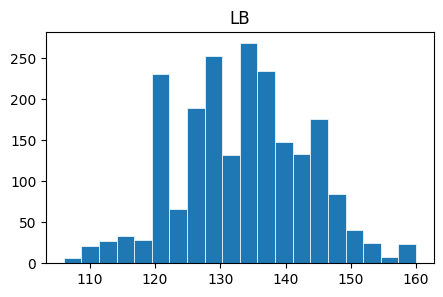

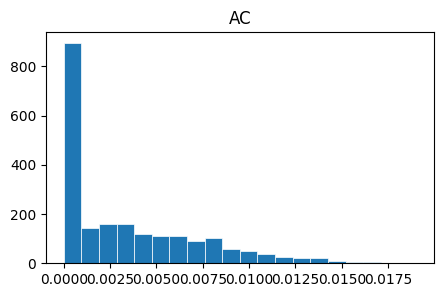

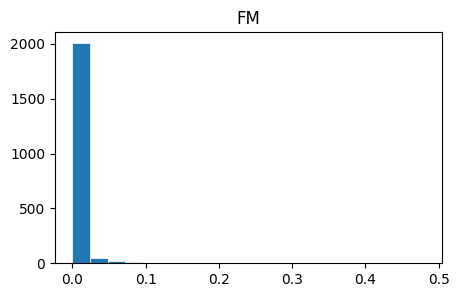

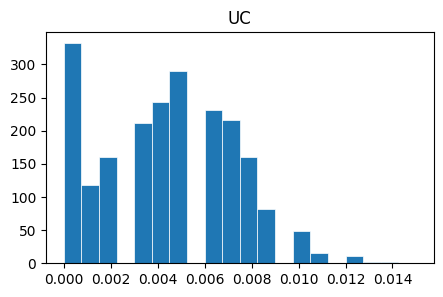

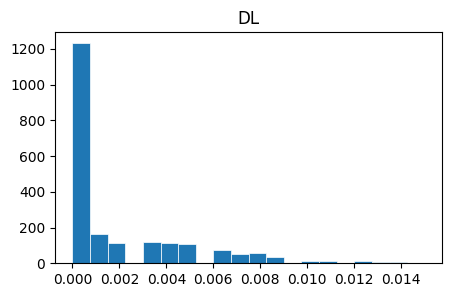

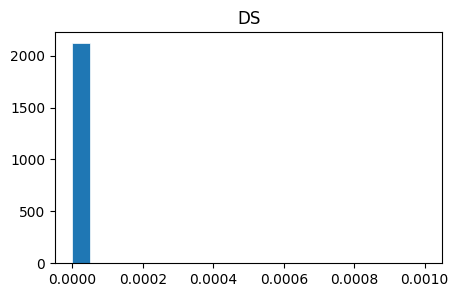

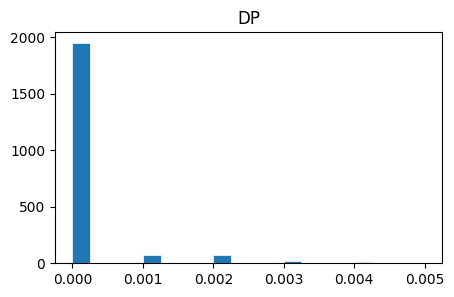

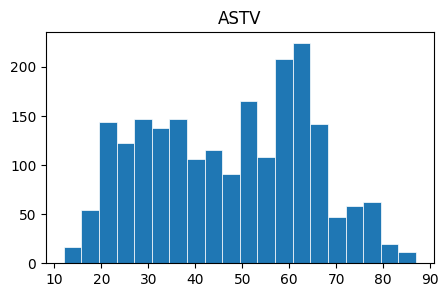

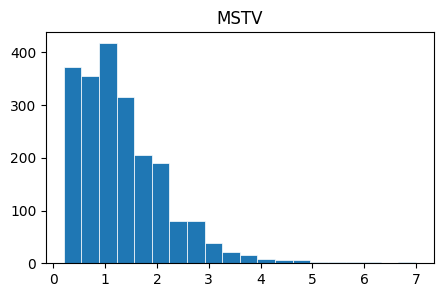

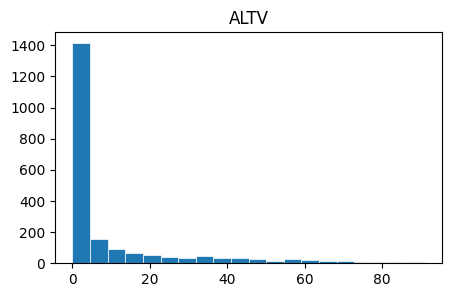

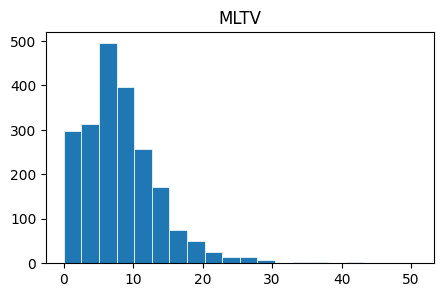

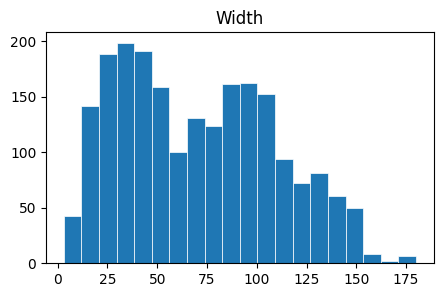

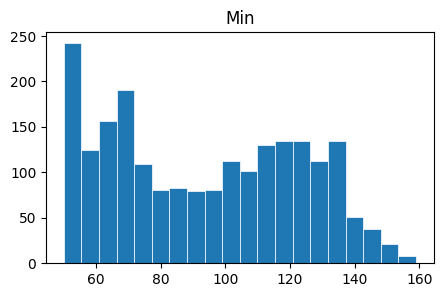

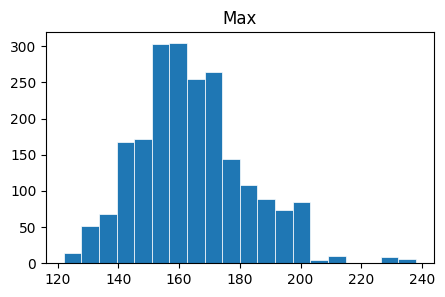

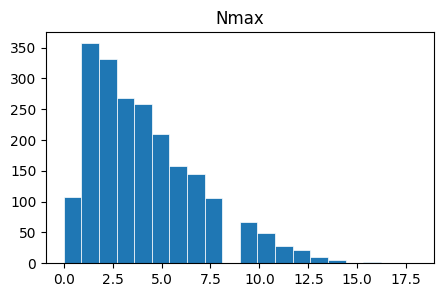

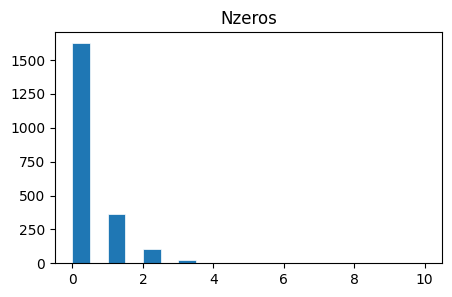

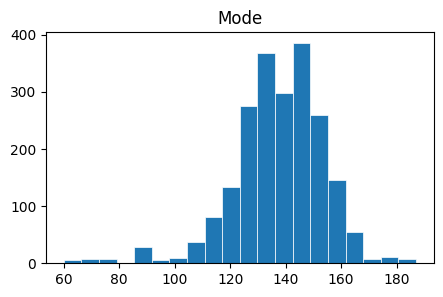

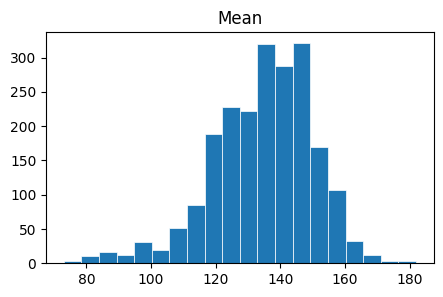

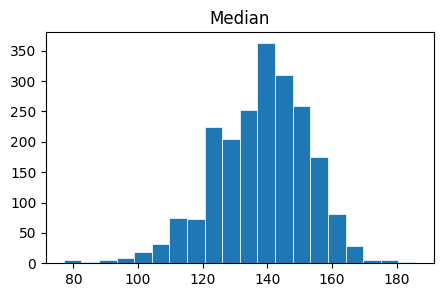

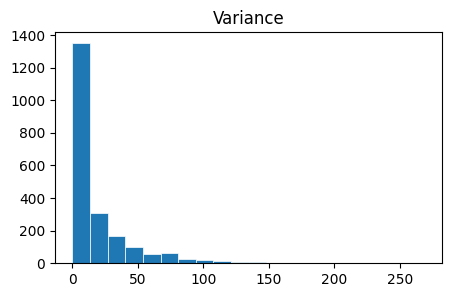

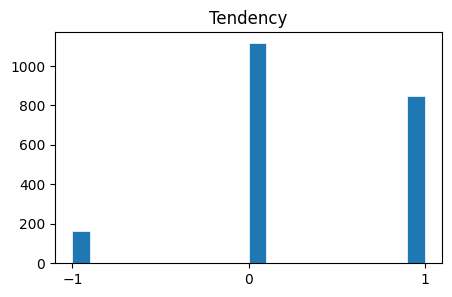

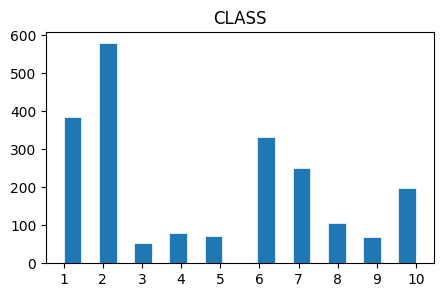

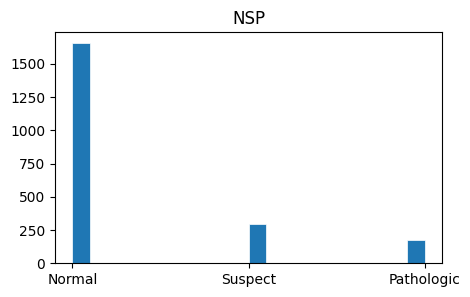

In [5]:
columns = cardiotocography.variables['name']

for column in columns:
  fig, ax = plt.subplots()
  fig.set_size_inches(5, 3)

  if column not in ['NSP', 'CLASS']:
    data = cardiotocography.data.features[column]
  else:
    data = cardiotocography.data.targets[column]

  ax.hist(data, bins=20, linewidth=0.5, edgecolor="white")
  if column == 'NSP':
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['Normal', 'Suspect', 'Pathologic'])
  elif column == 'CLASS':
    ax.set_xticks(np.arange(1, 11))
  elif column == 'Tendency':
    ax.set_xticks(np.arange(-1, 2))

  ax.set_title(column)

  plt.show()

  # If needed, create each plot one-by-one instead of with a loop

In [6]:
cardiotocography.data.features['DS'].min()

0.0

In [7]:
cardiotocography.data.features['DS'].max()

0.001

## Observation

Regarding Classes and NSP:

Each class describe a certain pattern measured by the CTG. Most cases in a certain class usually share the same NSP verdict, with several exceptions, as follows:

1. Calm sleep: Majority N, two cases of S
2. REM sleep: All is N
3. Calm vigilance: All is N
4. Active vigilance: All is N
5. Shift pattern (A or Susp with shifts): Majority S, three cases of N.
6. Accelerative/decelerative pattern (stress situation): Majority N, two cases of S.
7. Decelerative pattern (vagal stimulation): 227 to 25 ratio of N and S, respectively.
8. Largely decelerative pattern: All is P
9. Flat-sinusoidal pattern (pathological state): Majority P, one case of S.
10. Suspect pattern: Majority S, one case of P.

Only class 7 exhibits a significant higher mix of NSP verdict, with the minority occupying 10% of the cases. Every other case only have zero to three outliers.

# Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, f1_score

X = cardiotocography.data.features.copy()
y_nsp = cardiotocography.data.targets["NSP"].copy()   # 3-class label
y_class = cardiotocography.data.targets["CLASS"].copy()  # 10-class label

print("NSP counts:\n", y_nsp.value_counts())
print("\nCLASS counts:\n", y_class.value_counts())

# 3. Train/test split (for NSP)
X_train_nsp, X_test_nsp, y_train_nsp, y_test_nsp = train_test_split(
    X, y_nsp, test_size=0.2, stratify=y_nsp)

# 4. Train/test split (for CLASS)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, stratify=y_class)

# 5. Decision Tree for NSP
dt_nsp = DecisionTreeClassifier(class_weight="balanced", min_samples_leaf=20)
dt_nsp.fit(X_train_nsp, y_train_nsp)
y_pred_nsp = dt_nsp.predict(X_test_nsp)

print("\n--- NSP (3-class) ---")
print("Balanced Accuracy:", balanced_accuracy_score(y_test_nsp, y_pred_nsp))
print("Macro F1:", f1_score(y_test_nsp, y_pred_nsp, average="macro"))
print(classification_report(y_test_nsp, y_pred_nsp, target_names=["Normal","Suspect","Pathologic"]))

# 6. Decision Tree for CLASS
dt_class = DecisionTreeClassifier(class_weight="balanced", min_samples_leaf=5)
dt_class.fit(X_train_class, y_train_class)
y_pred_class = dt_class.predict(X_test_class)

print("\n--- CLASS (10-class) ---")
print("Balanced Accuracy:", balanced_accuracy_score(y_test_class, y_pred_class))
print("Macro F1:", f1_score(y_test_class, y_pred_class, average="macro"))
print(classification_report(y_test_class, y_pred_class))


NSP counts:
 NSP
1    1655
2     295
3     176
Name: count, dtype: int64

CLASS counts:
 CLASS
2     579
1     384
6     332
7     252
10    197
8     107
4      81
5      72
9      69
3      53
Name: count, dtype: int64

--- NSP (3-class) ---
Balanced Accuracy: 0.8715938815795871
Macro F1: 0.8360620682602106
              precision    recall  f1-score   support

      Normal       0.95      0.90      0.92       332
     Suspect       0.60      0.75      0.67        59
  Pathologic       0.87      0.97      0.92        35

    accuracy                           0.88       426
   macro avg       0.81      0.87      0.84       426
weighted avg       0.89      0.88      0.89       426


--- CLASS (10-class) ---
Balanced Accuracy: 0.8076176274075596
Macro F1: 0.7534939077948196
              precision    recall  f1-score   support

           1       0.79      0.68      0.73        77
           2       0.90      0.78      0.83       116
           3       0.47      0.82      0.60        1

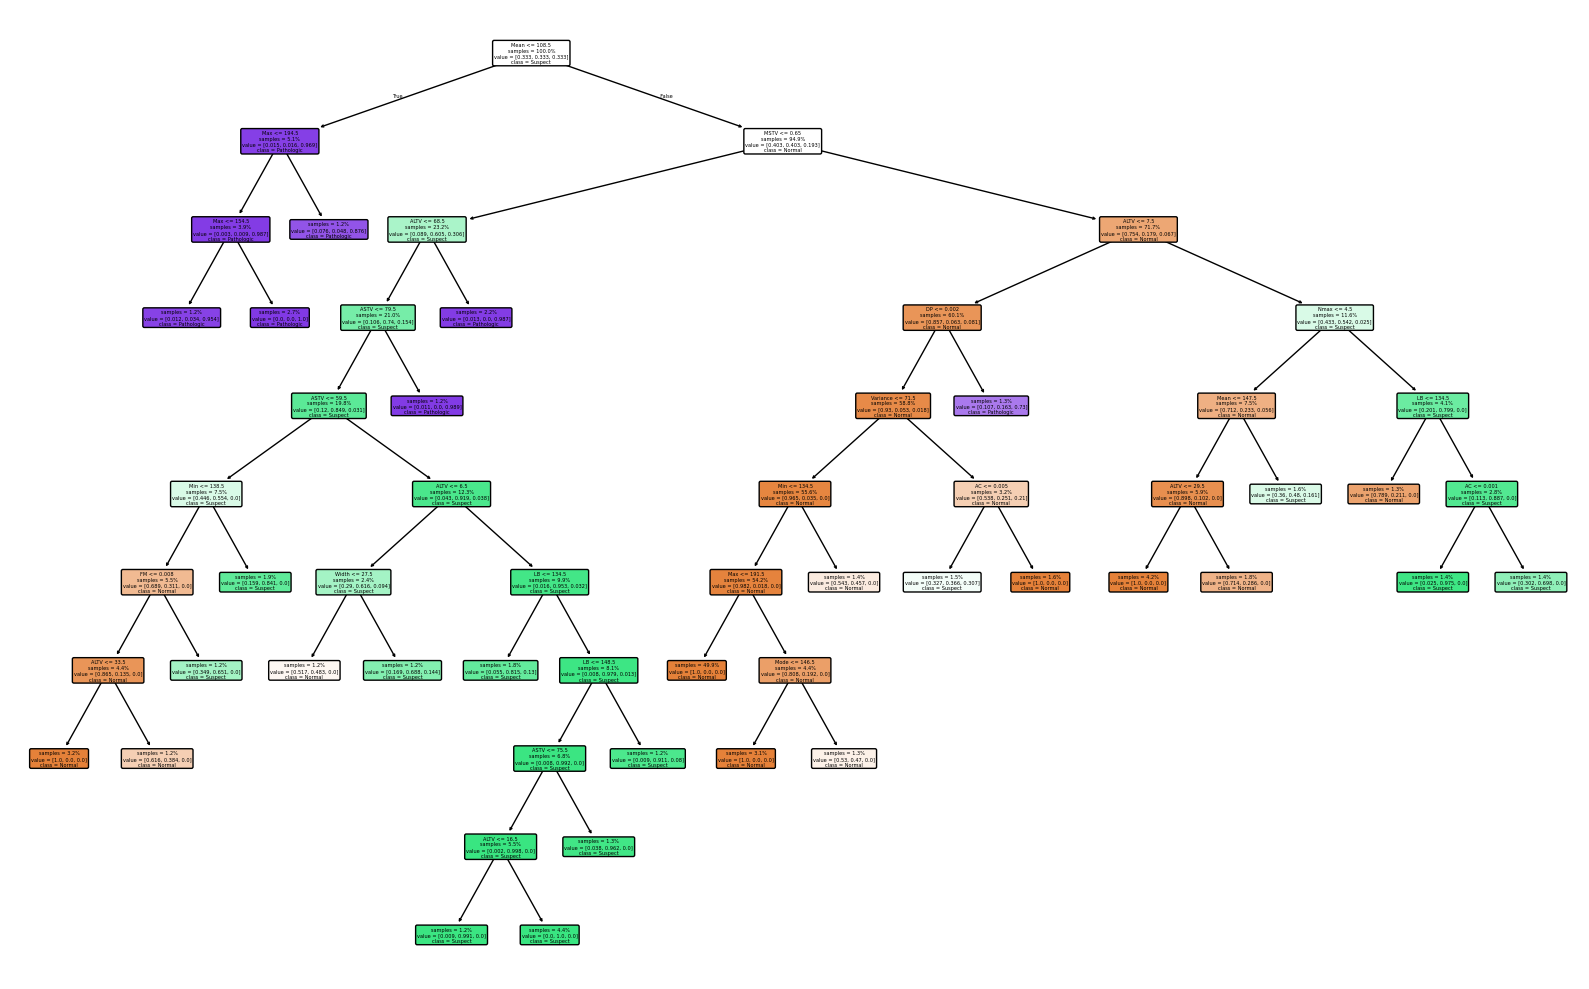

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(
    dt_nsp,                        # trained tree (e.g., dt_nsp or dt_cls)
    feature_names=X.columns,       # pandas column names
    class_names=["Normal","Suspect","Pathologic"],
    filled=True, rounded=True,
    impurity=False, proportion=True
)
plt.tight_layout()
plt.show()

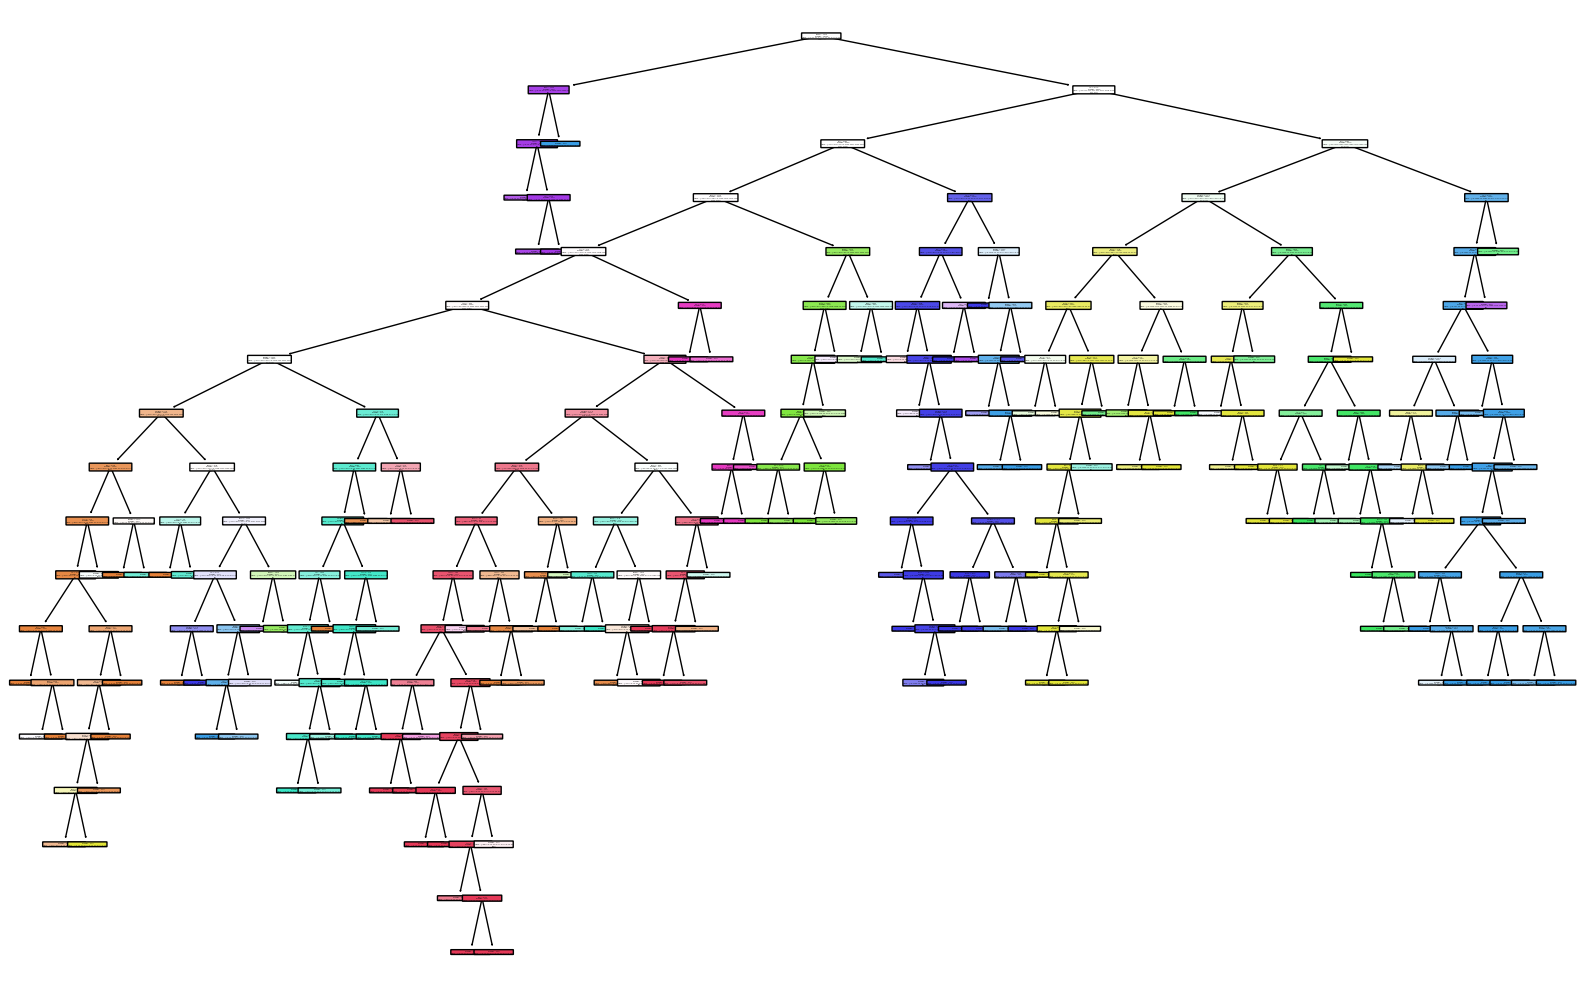

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))
plot_tree(
    dt_class,
    feature_names=X.columns,       # pandas column names
    class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
    filled=True, rounded=True,
    impurity=False, proportion=True
)
plt.tight_layout()
plt.show()

# Random Forest

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score

# 2) Load CTG dataset (UCI id=193)
ctg = fetch_ucirepo(id=193)
X = ctg.data.features.copy()
y_nsp = ctg.data.targets["NSP"].copy()      # 1=Normal, 2=Suspect, 3=Pathologic
y_cls = ctg.data.targets["CLASS"].copy()    # 1..10

print("X shape:", X.shape)
print("NSP counts:\n", y_nsp.value_counts().sort_index())
print("CLASS counts:\n", y_cls.value_counts().sort_index())

# 3) Helper: nice evaluation print
def evaluate(task_name, y_true, y_pred, target_names=None):
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    macro_f1 = f1_score(y_true, y_pred, average="macro")
    print(f"\n=== {task_name} ===")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"Macro F1        : {macro_f1:.4f}")
    print(
        classification_report(
            y_true, y_pred,
            target_names=target_names,  # use ["Normal","Suspect","Pathologic"] for NSP
            digits=4,
            zero_division=0
        )
    )


# 4) NSP (3-class): stratified split
X_train_nsp, X_test_nsp, y_train_nsp, y_test_nsp = train_test_split(
    X, y_nsp, test_size=0.20, stratify=y_nsp
)

# Random Forest for NSP
rf_nsp = RandomForestClassifier(
    n_estimators=600,          # more trees → stabler
    class_weight="balanced",   # make the model care about minority classes
    max_depth=None,            # let trees grow; forest voting controls variance
    min_samples_leaf=3,        # gentle regularization
    max_features="sqrt",       # classic RF rule-of-thumb
    n_jobs=-1,                 # use all cores
)
rf_nsp.fit(X_train_nsp, y_train_nsp)
y_pred_nsp = rf_nsp.predict(X_test_nsp)
evaluate("NSP (3-class) – RandomForest", y_test_nsp, y_pred_nsp,
         target_names=["Normal", "Suspect", "Pathologic"])

# Feature importances (global interpretability)
fi_nsp = pd.Series(rf_nsp.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 feature importances (NSP):\n", fi_nsp.head(10))


# 5) CLASS (10-class): stratified split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_cls, test_size=0.20, stratify=y_cls,
)

rf_cls = RandomForestClassifier(
    n_estimators=800,          # a bit more trees for harder 10-class task
    class_weight="balanced",
    max_depth=None,
    min_samples_leaf=3,
    max_features="sqrt",
    n_jobs=-1
)
rf_cls.fit(X_train_cls, y_train_cls)
y_pred_cls = rf_cls.predict(X_test_cls)
evaluate("CLASS (10-class) – RandomForest", y_test_cls, y_pred_cls)

fi_cls = pd.Series(rf_cls.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 feature importances (CLASS):\n", fi_cls.head(10))

X shape: (2126, 21)
NSP counts:
 NSP
1    1655
2     295
3     176
Name: count, dtype: int64
CLASS counts:
 CLASS
1     384
2     579
3      53
4      81
5      72
6     332
7     252
8     107
9      69
10    197
Name: count, dtype: int64

=== NSP (3-class) – RandomForest ===
Balanced Accuracy: 0.9425
Macro F1        : 0.9292
              precision    recall  f1-score   support

      Normal     0.9785    0.9578    0.9680       332
     Suspect     0.8030    0.8983    0.8480        59
  Pathologic     0.9714    0.9714    0.9714        35

    accuracy                         0.9507       426
   macro avg     0.9176    0.9425    0.9292       426
weighted avg     0.9536    0.9507    0.9517       426


Top 10 feature importances (NSP):
 ASTV      0.140057
ALTV      0.114985
Mean      0.111395
Median    0.083116
AC        0.079928
MLTV      0.070060
MSTV      0.066634
Mode      0.054290
LB        0.040678
DP        0.040123
dtype: float64

=== CLASS (10-class) – RandomForest ===
Balanced